In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, cross_validate

In [4]:
df = pd.read_csv("C:/Users/galax/Downloads/diabetes.csv")


In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

pretty clean data

analysis of correlation

<Axes: >

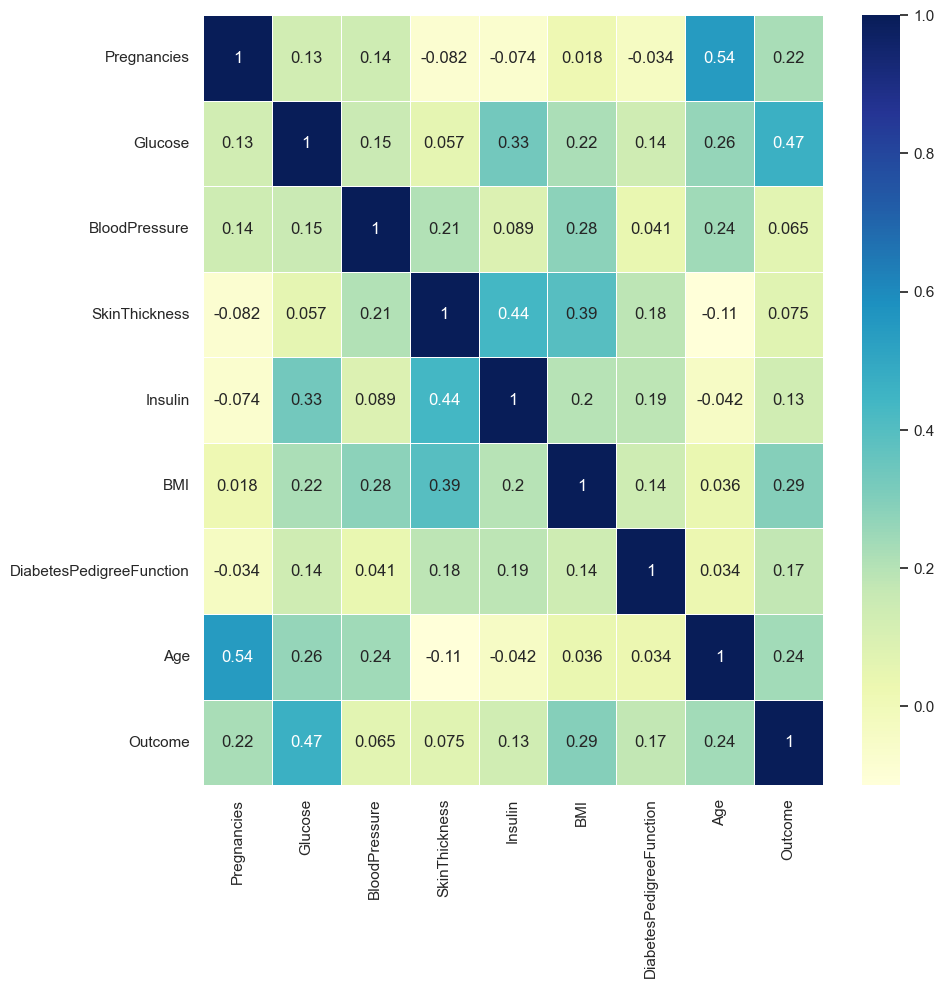

In [7]:
coef_matrix = df.corr()
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(coef_matrix, cmap="YlGnBu", annot=True, linewidths=.7)

data pre-processing

In [9]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data(test,train) separation

In [34]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=11)

standardaziation

In [35]:
std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])
X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])

Model making

In [44]:
log_model = LogisticRegression().fit(X_train, y_train)

5 fold cross validation

In [45]:
cv_results = cross_validate(log_model,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

prediction

In [46]:
y_pred = log_model.predict(X_test)

Model checking

In [49]:
acc = round(accuracy_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)

print('accuracy score: ', acc, "\n")
print(cm)

accuracy score:  0.78 

[[90 10]
 [24 30]]


ROC curve

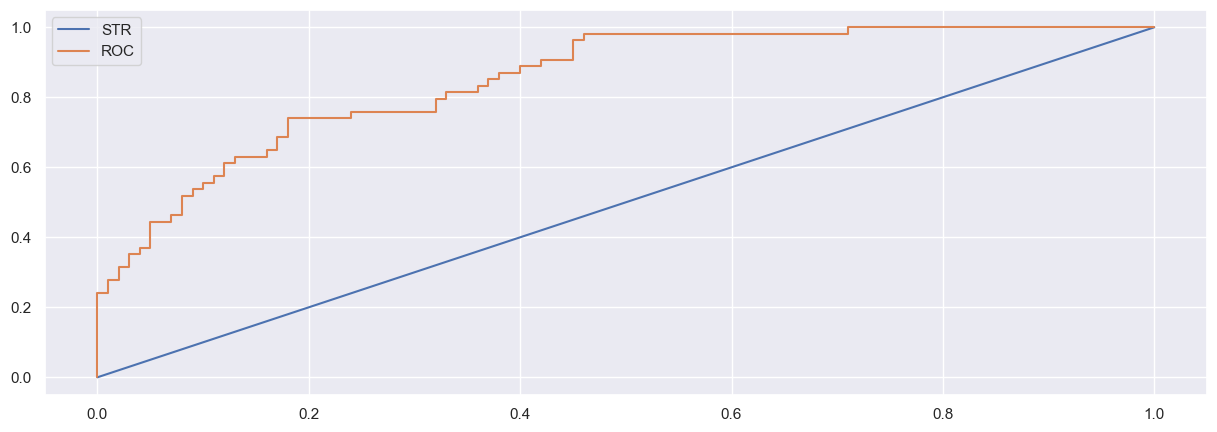

In [60]:
pred_positive_label = log_model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)
precisions, recalls, thresholds = roc_curve(y_test, pred_positive_label)
plt.figure(figsize=(15,5))

plt.plot([0,1],[0,1],label='STR')

plt.plot(fprs,tprs,label='ROC')

plt.legend()
plt.show()

AUC score

In [66]:
prediction = log_model.predict(X_test)

print('auc score : {}'.format(roc_auc_score(y_test,prediction)))


auc score : 0.7277777777777779
